In [10]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Model selection
select_Model = {1: "MobileNetV2", 2: "resnet50", 3: "DenseNet121"}

# Specify the model to use
model_name = select_Model[3] 
model_path = f"vehicle_classifier_{model_name.lower()}.h5"

model = load_model(model_path)

In [11]:
index_to_class = {0: "Bus", 1: "Car", 2: "Truck", 3: "Motorcycle"}

In [12]:
# Function to preprocess, predict, and display a single image
def predict_and_display_image(img_path):
    # Load the image and resize it to match the model's input size
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    # Make predictions
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)  
    predicted_class = index_to_class[predicted_index]  

    # Print the predicted class and confidence scores
    print("\n")
    print(f"Predicted Class: {predicted_class}")

    # Define the output directory based on the model used
    output_dir = f"./prediction/{model_name}/singleimagetest"
    os.makedirs(output_dir, exist_ok=True)

    # Save and display the prediction image
    plt.figure(figsize=(5, 5))
    plt.imshow(image.load_img(img_path, target_size=(224, 224))) 
    plt.axis("off")  
    plt.title(f"Predicted: {predicted_class}", fontsize=20)
    plt.savefig(os.path.join(output_dir, "singleImage.png"))
    plt.show()
    plt.close()

    # Save and display the confidence scores
    confidence_text = "\n".join(
        [f"{index_to_class[idx]}: {predictions[0][idx] * 100:.2f}%" for idx in range(len(predictions[0]))]
    )
    plt.figure(figsize=(5, 5))
    plt.subplot(2, 1, 1)
    plt.axis("off")
    plt.title("Confidence Scores", fontsize=25, loc="center") 
    plt.gcf().text(
        0.5, 0.3, confidence_text, fontsize=18, ha="center", transform=plt.gca().transAxes
    )
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "confidence_score.png"), bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()

    print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Predicted Class: Car


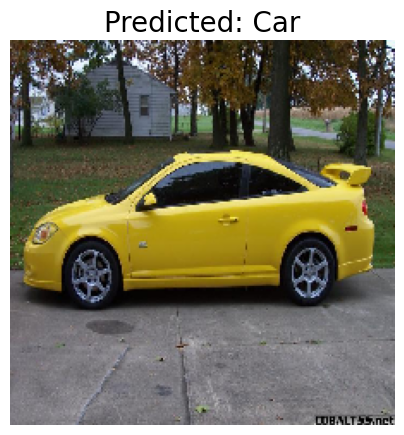

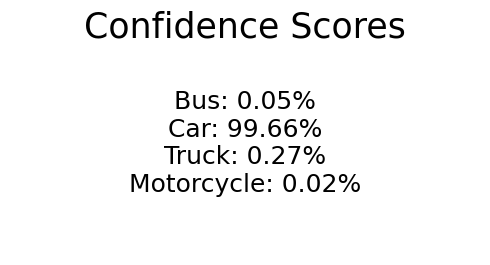

In [13]:
# Path to the test image
test_image_path = "./Dataset/Car/car153.jpg"

# Predict and display the result
predict_and_display_image(test_image_path)